# Data Exploration

In [2]:
# Importing libraries, loading data
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

path = '/Users/ahaeni/PRIVATE/CAS_Practical_ML/ML_project_github'
os.chdir(path)

# Loading data
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)

# Cheking available features
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  
3                             0.0                  NaN                    NaN  
4                             0.0             wxleyezf               emcorrxb  

[5 rows x 35 columns]

In [5]:
# Initial feature analysis
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
# Checking the labels
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0

## Overview

In [7]:
# Trying out pandas profiling for initial data exploration
# Joining the data
import pandas_profiling
joined_df = features_df.join(labels_df)
print(joined_df.shape)

joined_df.profile_report(
    correlations={
         "pearson": {"calculate": True},
         "spearman": {"calculate": False},
         "kendall": {"calculate": False},
         "phi_k": {"calculate": True},
         "cramers": {"calculate": False},
     }
)


(26707, 37)


It is evident from pandas profiling that the Pearson correlation can handly only numerical values, while PhiK correlation can handle both, numerical and categorical.

Text(0, 0.5, 'seasonal_vaccine')

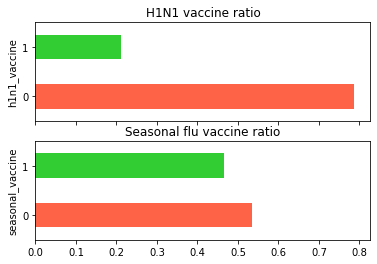

In [8]:
# It is visilble from the report above that the vaccines against swine and seasonal flu 
# are not distributed equally.

# Plot on how the vaccinations are distributed across the population
fig, ax = plt.subplots(2, 1, sharex=True)
colors = ['#FF6347', '#32CD32']
n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="H1N1 vaccine ratio", ax=ax[0], color = colors)
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Seasonal flu vaccine ratio", ax=ax[1], color = colors)
)
ax[1].set_ylabel("seasonal_vaccine")

It can be seen that about half of the population got vaccinated against seasonal flu, while only about 20% got vaccinated against swine flu.

## Find Correlations

In [9]:
# Example: concern about swine flu affects whether or not a person gets vaccinated.

h1n1_corr = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
h1n1_corr


h1n1_vaccine     0     1
h1n1_concern            
0.0           2849   447
1.0           6756  1397
2.0           8102  2473
3.0           3250  1341

In [10]:
h1n1_concern_sum = h1n1_corr.sum(axis='columns')
h1n1_concern_sum

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [11]:
h1n1_concern_rel = h1n1_corr.div(h1n1_concern_sum, axis='index')
h1n1_concern_rel

h1n1_vaccine         0         1
h1n1_concern                    
0.0           0.864381  0.135619
1.0           0.828652  0.171348
2.0           0.766147  0.233853
3.0           0.707907  0.292093

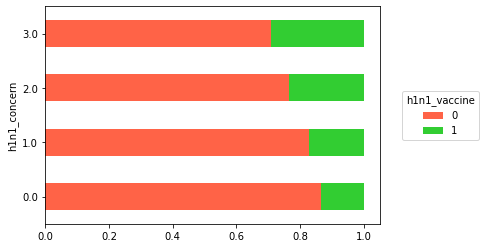

In [12]:
colors = ['#FF6347', '#32CD32']
ax = h1n1_concern_rel.plot.barh(stacked=True, color = colors)

ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Example: concern about swine flu affects whether or not a person gets vaccinated.
Now we could write a function and compare all features against the targets to find correlations.

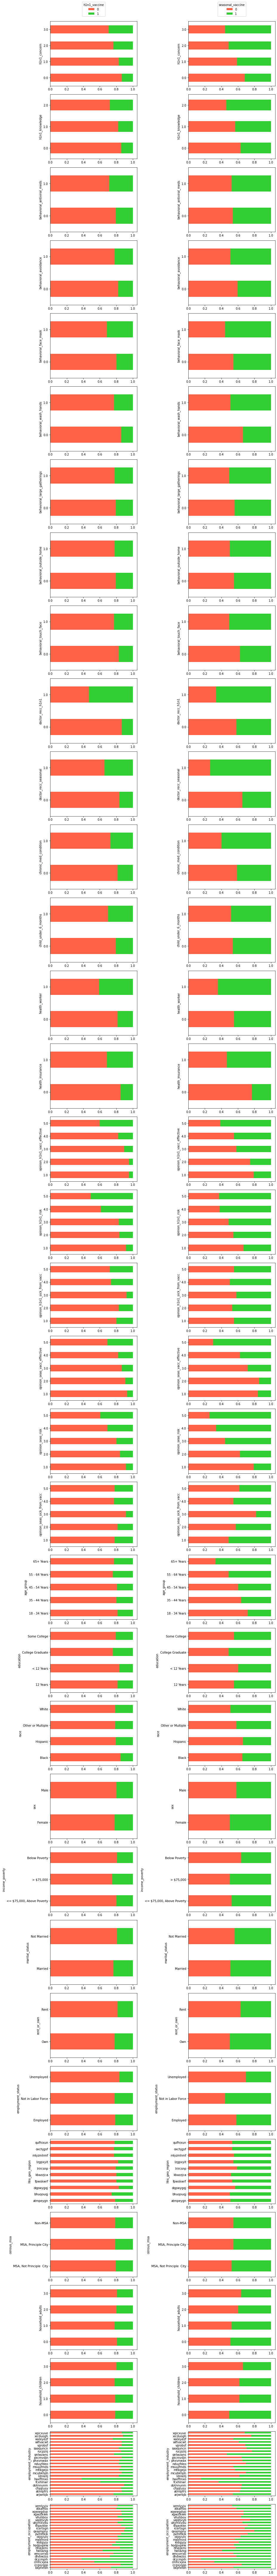

In [13]:
# Function that is reused for each feature and target.
def vaccine_distr_plot(col, target, data, ax):
    """Generate stacked bar chart visualizations of features against targets. 
    
    Args:
        col (string): column name
        target (string): target variable
        data (pandas DataFrame): dataframe 
        ax (matplotlib axes object): matplotlib axes object for plots
    """
    colors = ['#FF6347', '#32CD32']
    correl = (joined_df[[col, target]]
                  .groupby([col, target])
                  .size()
                  .unstack(target)
             )
    correl_sum = correl.sum(axis='columns')
    correl_sum_rel = correl.div(correl_sum, axis='index')

    correl_sum_rel.plot(kind="barh", stacked=True, ax=ax, color = colors)
    #ax.invert_yaxis()
    ax.legend().remove()
    
# Tapping of all relations between the features and the targets
cols_to_plot = list(features_df.columns) 

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(13,120)
)
for idx, col in enumerate(cols_to_plot):
    vaccine_distr_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccine_distr_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

From these graphs it can be seen that opinion_h1n1_risk, doctor_recc_h1n1 are of very great importance for vaccination against h1n1 influenza, for vaccination against seasonal influenza the feature opinion_seas_risk plays the most important role.

## Feature Selection

It is necessary to check the features for their importance. Several steps are necessary for this.

### Substituting NaN Values (for Feature Selection)

Since all values are ordinal or categorical, we don't have to replace the NaN values separately, but can replace everything with the value which occurs the most frequently

In [14]:
## with scikit-learn Funktion SimpleImputer
features_df_tmp = features_df.copy()
features_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [16]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
features_df_tmp = pd.DataFrame(imp.fit_transform(features_df_tmp))
# Controlling, if NaN values were substituted
features_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       26707 non-null  object
 1   1       26707 non-null  object
 2   2       26707 non-null  object
 3   3       26707 non-null  object
 4   4       26707 non-null  object
 5   5       26707 non-null  object
 6   6       26707 non-null  object
 7   7       26707 non-null  object
 8   8       26707 non-null  object
 9   9       26707 non-null  object
 10  10      26707 non-null  object
 11  11      26707 non-null  object
 12  12      26707 non-null  object
 13  13      26707 non-null  object
 14  14      26707 non-null  object
 15  15      26707 non-null  object
 16  16      26707 non-null  object
 17  17      26707 non-null  object
 18  18      26707 non-null  object
 19  19      26707 non-null  object
 20  20      26707 non-null  object
 21  21      26707 non-null  object
 22  22      26707 non-null

### Define Important Features

0 h1n1_vaccine


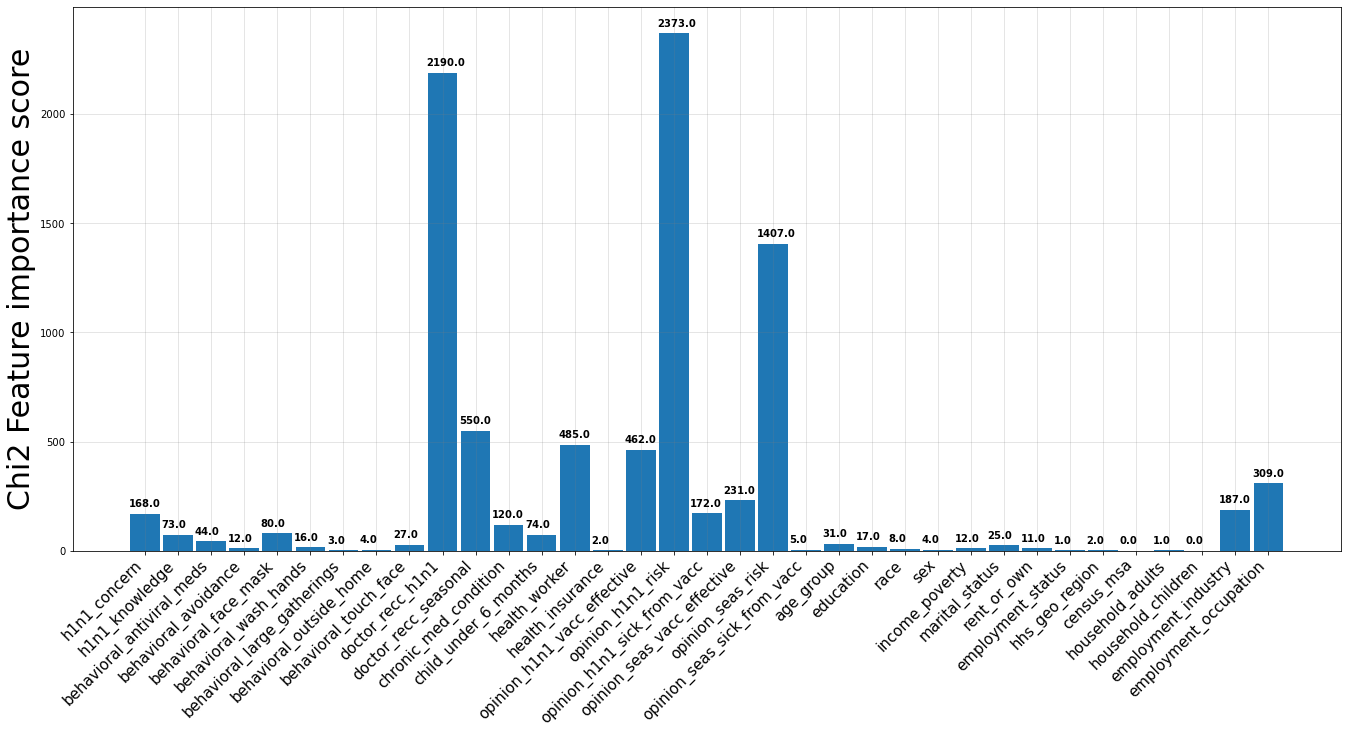

1 seasonal_vaccine


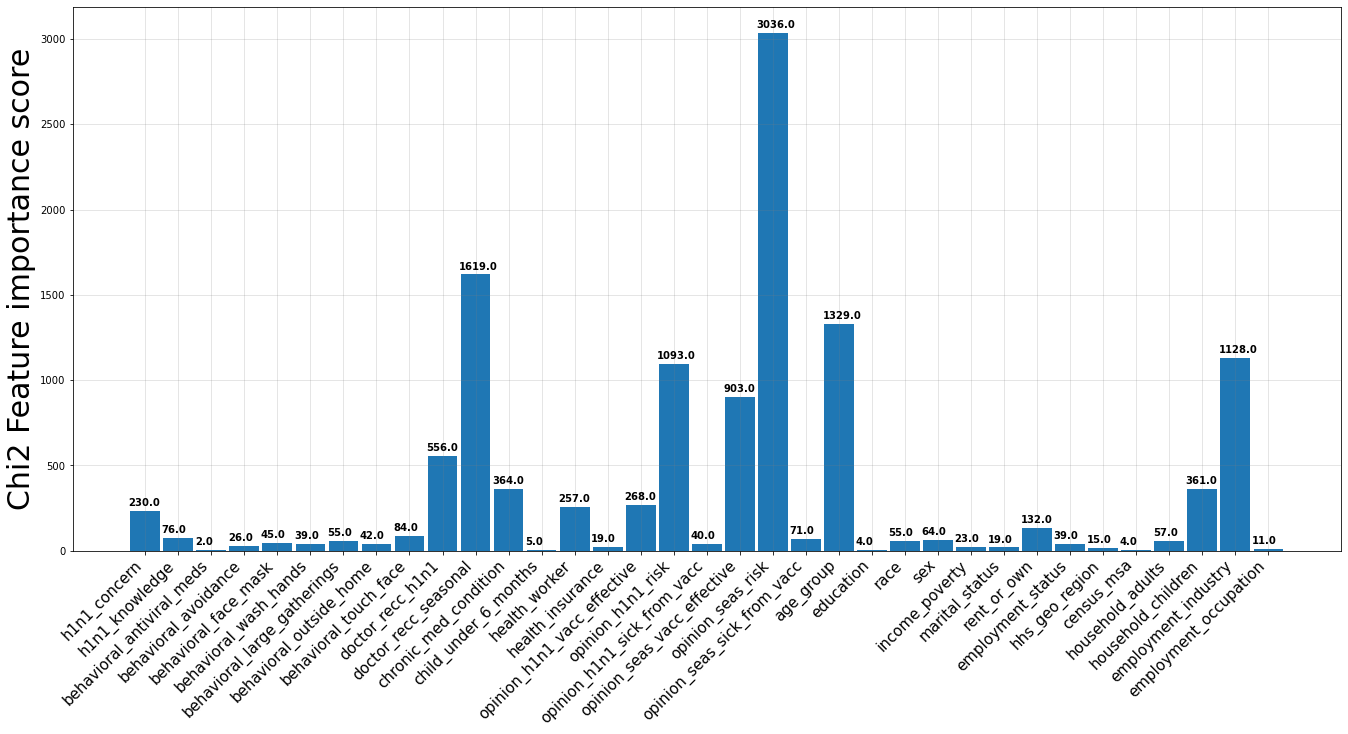

In [18]:
# Identify the most important features with a chi-squared test.
# https://machinelearningmastery.com/feature-selection-with-categorical-data/
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2

# Prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# Feature Selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    #fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def feature_importance(target, i=None):
    # Split the data (for h1n1 vaccine)
    X_train, X_test, y_train, y_test = train_test_split(
        features_df_tmp,
        labels_df[target],
        test_size=0.33,
        shuffle=True,
        stratify=labels_df, # is used so that the unequal 0 and 1 values in h1n1 vaccination 
                            # are more or less equally distributed between train and test data
        random_state=1
        )
    # Prepare input data 
    X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
    # Feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train, X_test_enc)
    
    plt.figure(figsize=(50,10))
    plt.subplot(1, 2, idx+1)
    plt.bar(features_df.columns,fs.scores_, width = 0.9)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('Chi2 Feature importance score', fontsize=30)
    plt.xticks(fontsize= 15)
    plt.grid(b = True, color ='grey', 
        linestyle ='-', linewidth = 1, 
        alpha = 0.2) 
    for x,y in enumerate(fs.scores_):
        plt.text(x-0.5, y + 30, str(round(y)), fontweight='bold')
    
    plt.show()
    
    
targets = ["h1n1_vaccine", "seasonal_vaccine"]
for idx, target in enumerate(targets):
    print(idx,target)
    feature_importance(target)
    
    

The following features are irrelevant for both vaccinations and can be dropped: health_insurance, education, income_poverty, marital_status, employment_status, hhs_geo_region, census_msa.

### Delete irrelevant Features from the Data Frame

In [19]:
features_df_tmp = features_df.copy()
features_df_tmp = features_df_tmp.drop([
    'health_insurance', 
    'education',
    'income_poverty', 
    'marital_status', 
    'employment_status',
    'hhs_geo_region',
    'census_msa'
], axis=1)
# features_df_tmp

# Data Preparation and Modelling

Which algorithms can calculate probabilities?

In [20]:
# https://stackoverflow.com/questions/30056331/how-to-list-all-scikit-learn-classifiers-that-support-predict-proba
from sklearn.utils import all_estimators

algorithms = all_estimators()

for name, class_ in algorithms:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier   
from sklearn.naive_bayes import BernoulliNB  
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 3

## Define Algorithms through Grids

In [22]:
cols = features_df_tmp.columns

# Chain transformers in a pipeline
# https://medium.com/analytics-vidhya/scikit-learn-pipelines-for-beginners-235abd0b8ea1
# https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html

preprocessing_steps = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')), # substitute NaN values
    ('ordinal_encoder', OrdinalEncoder()),     # Convert ordinal and categorical data into numerical
    ('standard_scaler', StandardScaler())      # Data standardization
])

# Create preprocessor for the final pipeline.
# Each line is a tuple of:
# (name, sklearn transformer, columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("preprocessing", preprocessing_steps, cols)
    ],
)

# Creating pipelines 
# https://medium.com/analytics-vidhya/scikit-learn-pipelines-for-beginners-235abd0b8ea1
# https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html

pipe_logistic_regression = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(random_state=RANDOM_SEED)),
])

pipe_ada_boost = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", AdaBoostClassifier(random_state=RANDOM_SEED)),
])

pipe_random_forest = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=RANDOM_SEED)),
])

pipe_gradient_boosting = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", GradientBoostingClassifier(random_state=RANDOM_SEED)),
])

pipe_hist_gradient_boosting = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", HistGradientBoostingClassifier(random_state=RANDOM_SEED)),
])

pipe_bernouli_nb = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", BernoulliNB()),
])

pipe_gaussian_nb = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", GaussianNB()),
])

pipe_k_neighbors = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", KNeighborsClassifier()),
])

pipe_lin_discr = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LinearDiscriminantAnalysis()),
])

pipe_quad_discr = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", QuadraticDiscriminantAnalysis()),
])

pipe_svc = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", SVC(random_state=RANDOM_SEED)),
])


# Grid Params
grid_params_lr =[{
    'clf__penalty':['l2'],
    'clf__C':[1.0, 0.5, 0.1],
    'clf__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'clf__max_iter':[100,200,300]
}]

grid_params_ab =[{
    'clf__n_estimators':[300, 400, 500]
}]

grid_params_rf =[{
    'clf__n_estimators':[50, 100, 150],
    #'clf__min_samples_leaf': [1.0, 0.5, 0.1],
    #'clf__max_depth': [1.0, 0.5, 0.1],
    'clf__min_impurity_decrease':[0.01,0.03,0.05,0.08,0.1]
}]

grid_params_gbc =[{
    'clf__n_estimators':[100, 150, 200],
    'clf__min_impurity_decrease':[0.01,0.03,0.05,0.08,0.1]
}]

grid_params_hgbc =[{
    'clf__max_iter':[100, 150, 200],
    'clf__learning_rate':[0.01,0.03,0.05,0.08,0.1]
}]

grid_params_bn_nb =[{
    'clf__alpha':[0.1, 0.3, 0.5, 0.8, 1.0]
}]

grid_params_g_nb =[{ 
}]

grid_params_kn =[{
    'clf__n_neighbors':[80,90,100,200,300],
    'clf__weights':['uniform','distance'],
    'clf__p':[1,2]
}]

grid_params_lda =[{
    'clf__solver':['svd','lsqr', 'eigen'],
}]

grid_params_qda =[{
}]

grid_params_svc =[{
    #'clf__C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clf__kernel':['linear'],
    'clf__gamma':['auto'],
    'clf__probability':[True]
}]

# Grid Search
grid_search_lr = GridSearchCV(estimator=pipe_logistic_regression,
                              param_grid = grid_params_lr,
                              scoring='roc_auc'
                             )

grid_search_ab = GridSearchCV(estimator=pipe_ada_boost,
                              param_grid = grid_params_ab,
                              scoring='roc_auc'
                             )

grid_search_rf = GridSearchCV(estimator=pipe_random_forest,
                              param_grid = grid_params_rf,
                              scoring='roc_auc'
                             )

grid_search_gbc= GridSearchCV(estimator=pipe_gradient_boosting,
                              param_grid = grid_params_gbc,
                              scoring='roc_auc'
                             )

grid_search_hgbc= GridSearchCV(estimator=pipe_hist_gradient_boosting,
                              param_grid = grid_params_hgbc,
                              scoring='roc_auc'
                             )

grid_search_bn_nb= GridSearchCV(estimator=pipe_bernouli_nb,
                              param_grid = grid_params_bn_nb,
                              scoring='roc_auc'
                             )

grid_search_g_nb= GridSearchCV(estimator=pipe_gaussian_nb,
                              param_grid = grid_params_g_nb,
                              scoring='roc_auc'
                             )

grid_search_kn= GridSearchCV(estimator=pipe_k_neighbors,
                             param_grid = grid_params_kn,
                             scoring='roc_auc'
                             )


grid_search_lda= GridSearchCV(estimator=pipe_lin_discr,
                             param_grid = grid_params_lda,
                             scoring='roc_auc'
                             )

grid_search_qda= GridSearchCV(estimator=pipe_quad_discr,
                             param_grid = grid_params_qda,
                             scoring='roc_auc'
                             )

grid_search_svc= GridSearchCV(estimator=pipe_svc,
                             param_grid = grid_params_svc,
                             scoring='roc_auc'
                             )

# All the grids
grids = [
         grid_search_lr,
         grid_search_ab, 
         grid_search_rf, 
         grid_search_gbc, 
         grid_search_hgbc,
         grid_search_bn_nb,
         grid_search_g_nb,
         grid_search_kn,
         grid_search_lda,
         grid_search_qda,
         grid_search_svc
        ]


# Grid Dictionary
grid_dict = {0: 'LogisticRegression', 
             1: 'AdaBoostClassifier', 
             2: 'RandomForestClassifier',
             3: 'GradientBoostingClassifier',
             4: 'HistGradientBoostingClassifier',
             5: 'BernoulliNB',
             6: 'GaussianNB',
             7: 'KNeighborsClassifier',
             8: 'LinearDiscriminantAnalysis',
             9: 'QuadraticDiscriminantAnalysis',
             10: 'SVC'
        }

## Predictions for h1n1 Vaccine

In [23]:
# Split data into test and training data
X_train, X_test, y_train, y_test = train_test_split(
    features_df_tmp,
    labels_df['h1n1_vaccine'],
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

print('Estimator_h1n1                     Score               ')
print('=======================================================')

for idx, grid in enumerate(grids):
    grid.fit(X_train, y_train)
    
    preds = grid.predict_proba(X_test)
    
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[:, 1]
    },
    index = y_test.index
    )
    
    print('%-32s   %f' %  (grid_dict[idx], roc_auc_score(y_test, y_preds)))
    
    #Best params
    #print('Best params: %s' % grid.best_params_)
    # Best training data accuracy
    #print('Best training accuracy: %.3f' % grid.best_score_)
    #print('\n')

Estimator_h1n1                     Score               
LogisticRegression                 0.825212
AdaBoostClassifier                 0.830782
RandomForestClassifier             0.797819
GradientBoostingClassifier         0.832757
HistGradientBoostingClassifier     0.831050
BernoulliNB                        0.785257
GaussianNB                         0.784181
KNeighborsClassifier               0.811134
LinearDiscriminantAnalysis         0.822572
QuadraticDiscriminantAnalysis      0.792021
SVC                                0.821427


## Predictions for Seasonal Flu Vaccine

In [24]:
# Daten in Test- und Trainingsdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    features_df_tmp,
    labels_df['seasonal_vaccine'],
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

print('Estimator_seas                     Score               ')
print('=======================================================')

for idx, grid in enumerate(grids):
    grid.fit(X_train, y_train)
    
    preds = grid.predict_proba(X_test)
    
    y_preds = pd.DataFrame(
    {
        "seasonal_vaccine": preds[:, 1]
    },
    index = y_test.index
    )
    
    print('%-32s   %f' %  (grid_dict[idx], roc_auc_score(y_test, y_preds)))
    

Estimator_seas                     Score               
LogisticRegression                 0.843182
AdaBoostClassifier                 0.852469
RandomForestClassifier             0.808684
GradientBoostingClassifier         0.854664
HistGradientBoostingClassifier     0.854361
BernoulliNB                        0.808070
GaussianNB                         0.797738
KNeighborsClassifier               0.833334
LinearDiscriminantAnalysis         0.843063
QuadraticDiscriminantAnalysis      0.813675
SVC                                0.843468


GradientBoostingClassifier seems to be the best algorithm for both targets.

## Predictions for Multiple Labels

In [25]:
# Chain transformers in a pipeline
preprocessing_steps = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')), # NaN Werte ersetzen
    ('ordinal_encoder', OrdinalEncoder()),     # Ordinale und kategoriale Daten in numerische umwandeln
    ('standard_scaler', StandardScaler())      # Standartisieren
])

# Create preprocessor for the final pipeline.
# Each line is a tuple of:
# (name, sklearn transformer, columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("preprocessing", preprocessing_steps, features_df_tmp.columns)
    ],
)

# Train for multiple labels with the "best" algorithm - GradientBoostingClassifier
estimators = MultiOutputClassifier(
    estimator = GradientBoostingClassifier(min_impurity_decrease=0.05, n_estimators=100)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

# Split data into test and training data
X_train, X_test, y_train, y_test = train_test_split(
    features_df_tmp,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

# Train the model
full_pipeline.fit(X_train, y_train)

# Predict probabilities
preds = full_pipeline.predict_proba(X_test)
preds

[array([[0.93863887, 0.06136113],
        [0.59207681, 0.40792319],
        [0.81888759, 0.18111241],
        ...,
        [0.46562089, 0.53437911],
        [0.85649816, 0.14350184],
        [0.96116061, 0.03883939]]),
 array([[0.91438779, 0.08561221],
        [0.25750613, 0.74249387],
        [0.1165849 , 0.8834151 ],
        ...,
        [0.85892478, 0.14107522],
        [0.32487134, 0.67512866],
        [0.90420074, 0.09579926]])]

In [26]:
# Probabilities that a vaccination will be administered in a data frame:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


h1n1_vaccine  seasonal_vaccine
respondent_id                                
24919              0.061361          0.085612
2848               0.407923          0.742494
25300              0.181112          0.883415
11044              0.486873          0.920393
5712               0.051031          0.793187

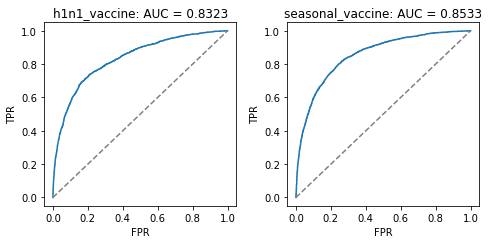

In [27]:
# AUC/ROC curve
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )
    
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [28]:
# Joint ROC / AUC Score
roc_auc_score(y_test, y_preds)

0.8428212705540772

# Retrain Model on Full Dataset

In order to make the best predictions for the test data, the model should be trained again on the whole dataset (without train-test-split).

In [29]:
%%time
full_pipeline.fit(features_df, labels_df)
None

CPU times: user 6.01 s, sys: 175 ms, total: 6.18 s
Wall time: 6.31 s


In [30]:
# Generate Predictions for the test set
test_features_df = pd.read_csv(
    "test_set_features.csv", 
    index_col="respondent_id"
)

test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.9136301 , 0.0863699 ],
        [0.96123715, 0.03876285],
        [0.62232738, 0.37767262],
        ...,
        [0.88999582, 0.11000418],
        [0.9449691 , 0.0550309 ],
        [0.51464199, 0.48535801]]),
 array([[0.75651134, 0.24348866],
        [0.93245451, 0.06754549],
        [0.26755866, 0.73244134],
        ...,
        [0.81618583, 0.18381417],
        [0.63270637, 0.36729363],
        [0.45440027, 0.54559973]])]

In [31]:
# View the submission_format.csv file. The sample probabilities must be overwritten

submission_df = pd.read_csv(
    "submission_format.csv", 
    index_col="respondent_id"
)
submission_df.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707                   0.5               0.7
26708                   0.5               0.7
26709                   0.5               0.7
26710                   0.5               0.7
26711                   0.5               0.7

In [32]:
# Ensure that the indexes in the features and labels file are in the correct order and match
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

In [33]:
# Store prediction in the data frame (only the probabilities for "1" are stored = 
# probability that the person will be vaccinated)
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.086370          0.243489
26708              0.038763          0.067545
26709              0.377673          0.732441
26710              0.555969          0.839068
26711              0.221566          0.497255

In [34]:
# Write the results to the file to be submitted to drivendata.org
submission_df.to_csv('my_submission.csv')
!head my_submission.csv

respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.08636990262658646,0.24348865623316834
26708,0.038762846722096206,0.06754548961359978
26709,0.37767261615928865,0.7324413410723188
26710,0.5559690267750481,0.8390683702338249
26711,0.22156599846476202,0.49725520440933624
26712,0.626900477764982,0.9442427465898463
26713,0.3742762737225447,0.5793314829019545
26714,0.11734799165304077,0.13460700614547016
26715,0.043793085655014316,0.1127939799521449
